Task 1

TASK 1: DATA EXPLORATION

1. BASIC DATA INFORMATION
Dataset Shape: (1000, 16)
Number of rows: 1000
Number of columns: 16


First 5 rows:
   Gender  Age    City  Academic Pressure  Work Pressure  CGPA  \
0    Male   23  City C                  6              4  2.47   
1  Female   24  City B                  5              3  2.23   
2    Male   18  City C                  4              1  1.66   
3    Male   18  City C                 10              3  1.72   
4    Male   18  City A                  1              2  2.16   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                   1                 1          5-6 hours        Healthy   
1                   4                 4  More than 8 hours      Unhealthy   
2                   4                 1  More than 8 hours       Moderate   
3                   3                 2          7-8 hours       Moderate   
4                   1                 2          7-8 hours        Healthy   

  D

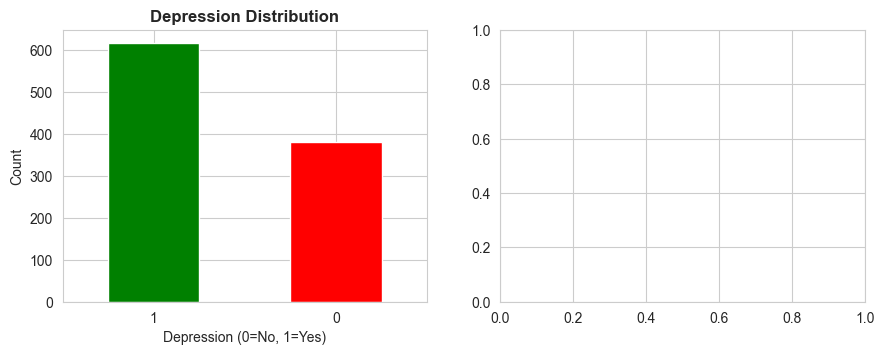

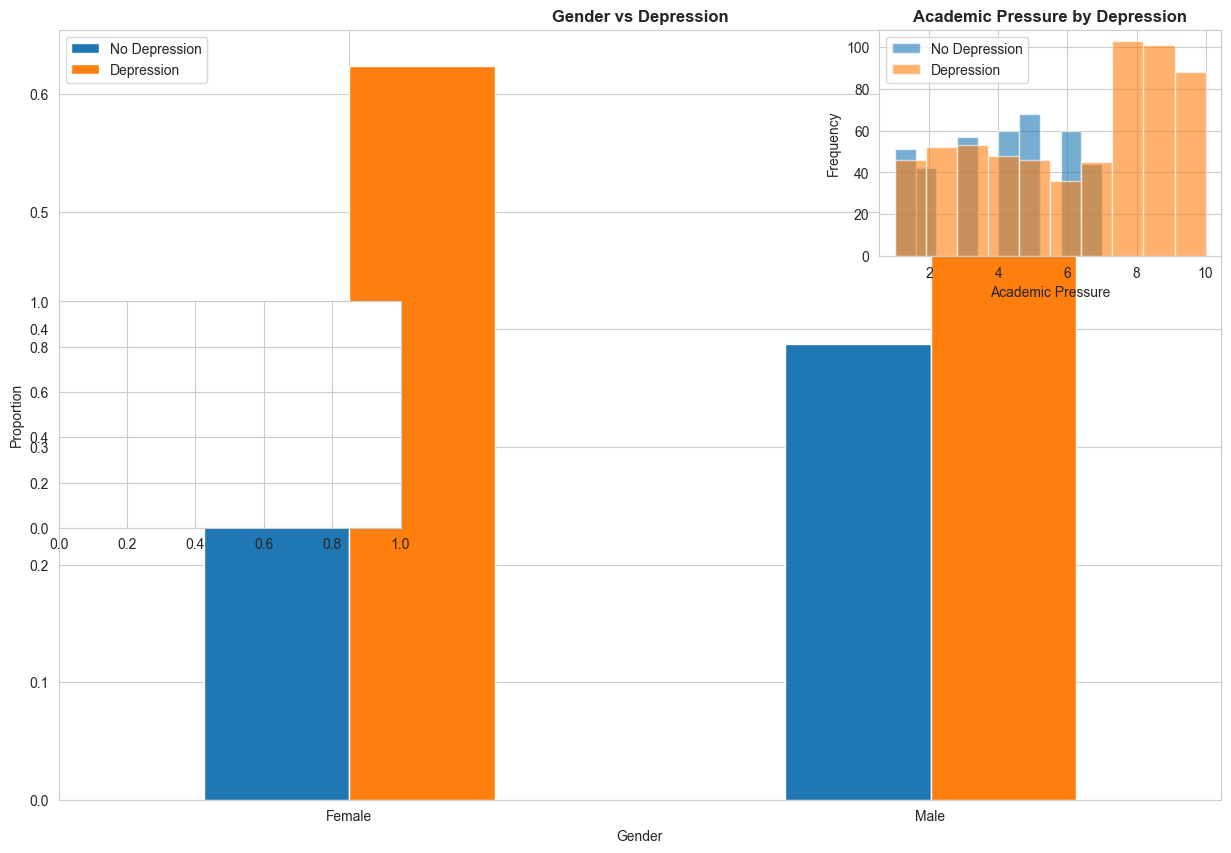

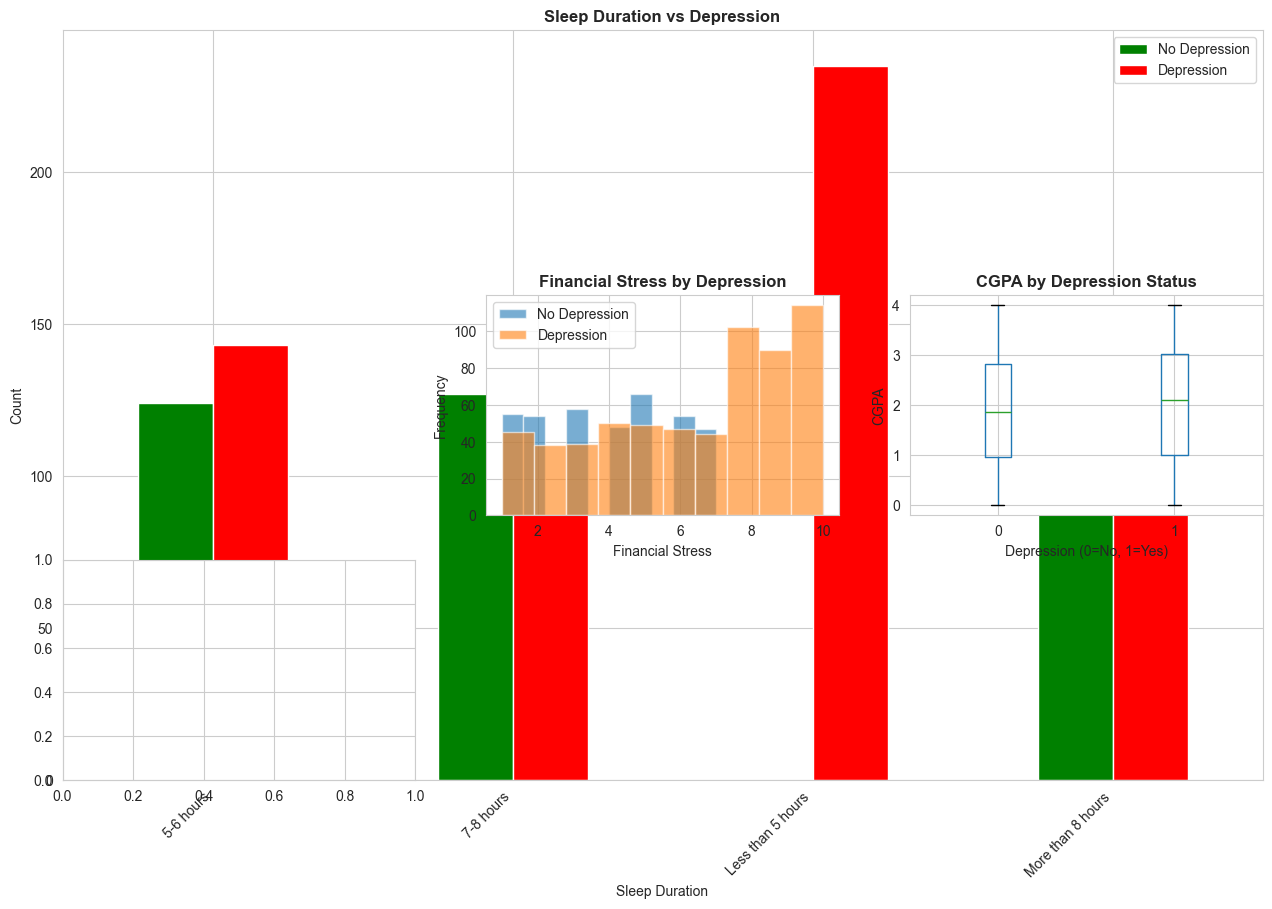

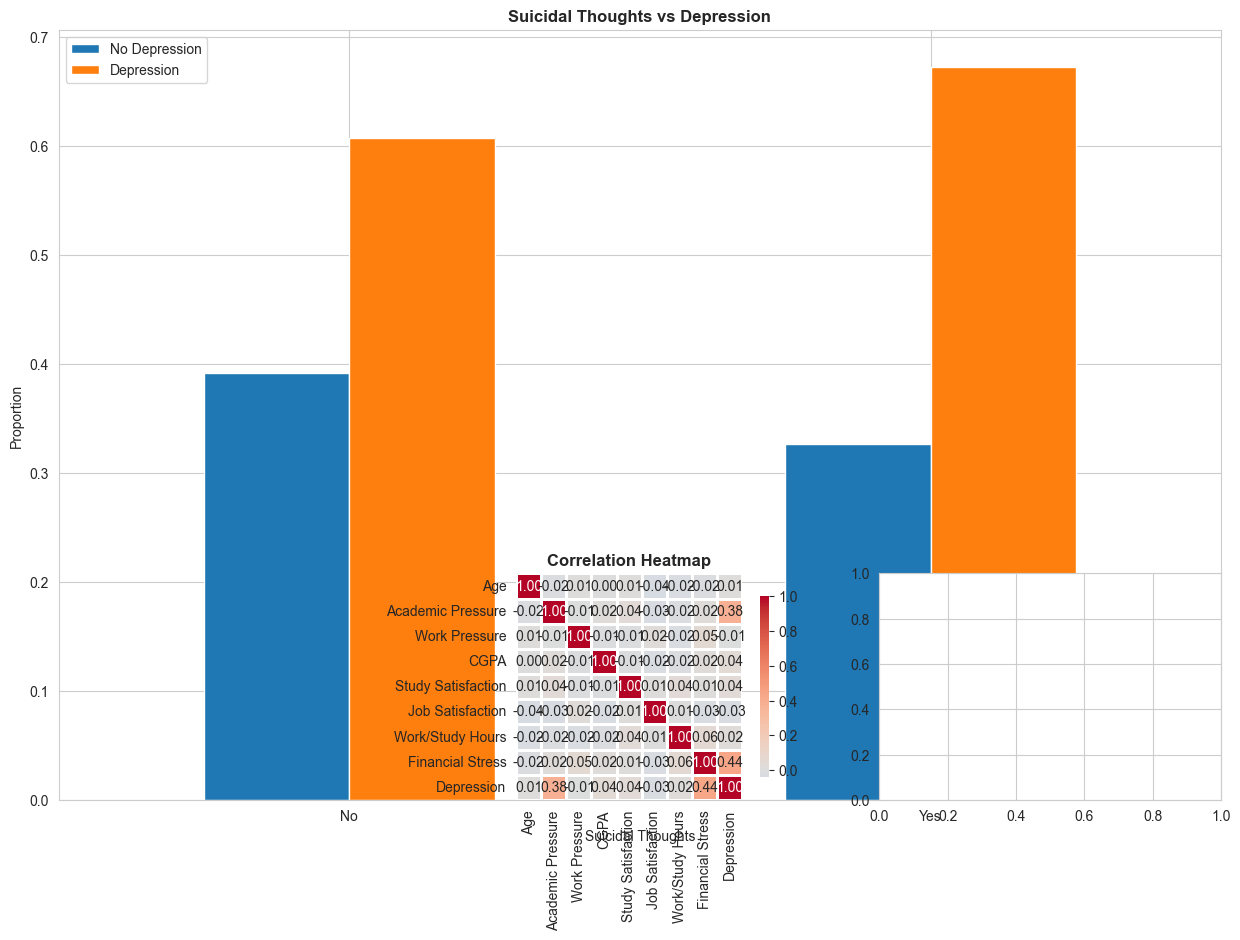

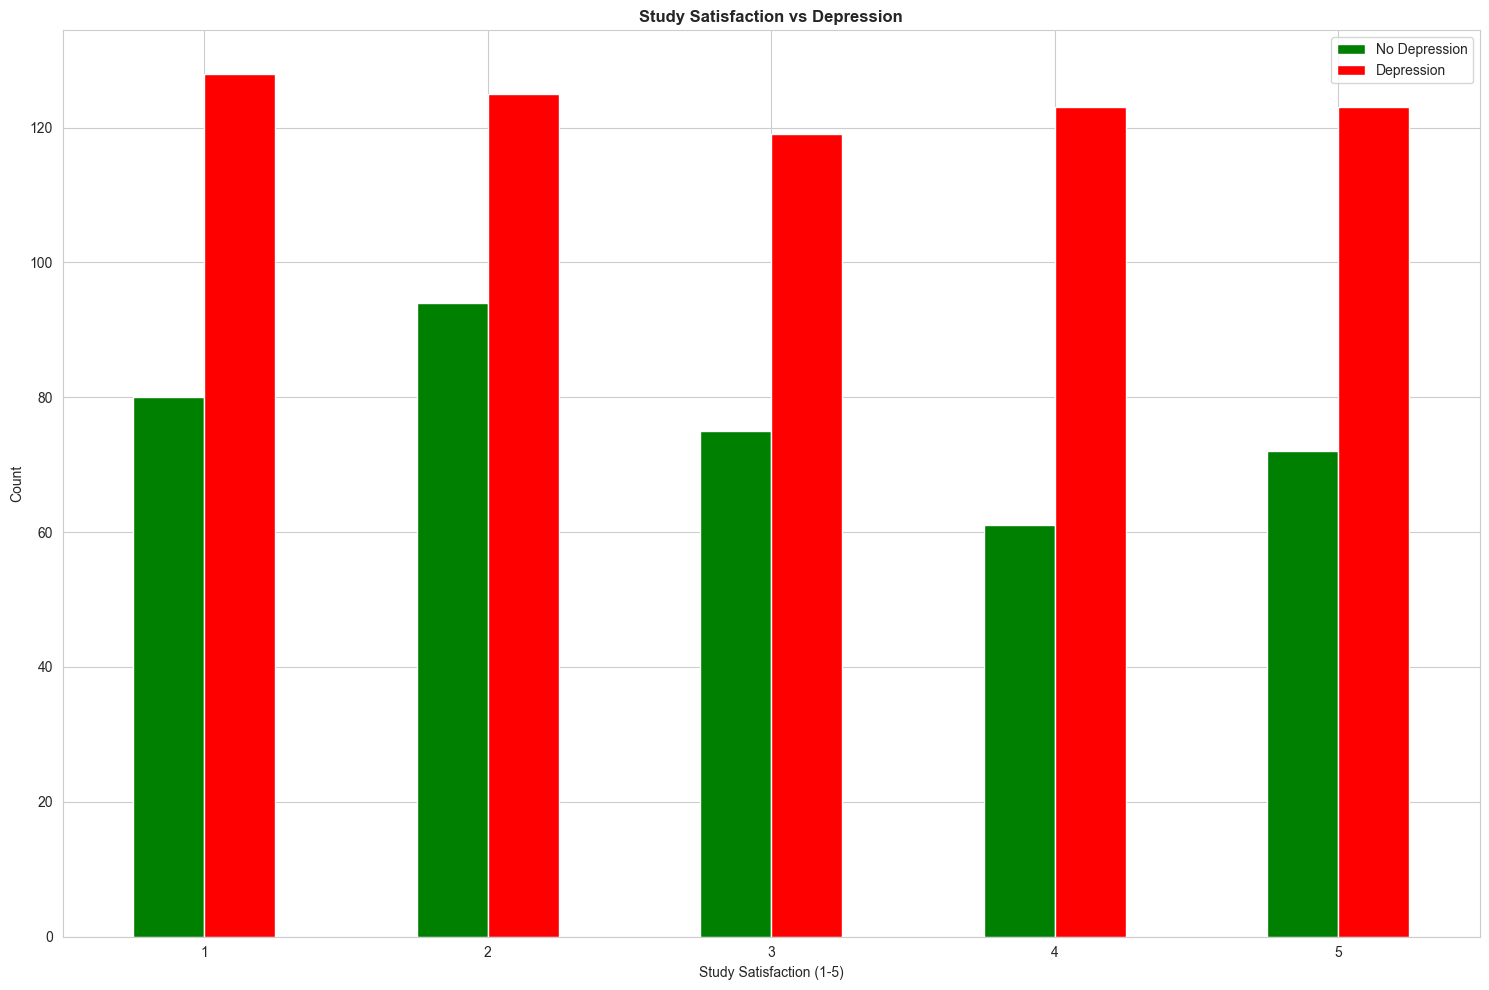



5. KEY INSIGHTS FROM EXPLORATION

Average values by Depression Status:
            Academic Pressure  Financial Stress      CGPA  Study Satisfaction
Depression                                                                   
0                    4.068063          3.958115  1.908298            2.871728
1                    6.270227          6.535599  2.013188            2.980583


Sleep Duration Analysis:
Depression             0      1
Sleep Duration                 
5-6 hours          32.46  23.14
7-8 hours          33.25  21.20
Less than 5 hours   0.00  38.03
More than 8 hours  34.29  17.64


Suicidal Thoughts vs Depression:
Depression           0    1   All
Suicidal Thoughts                
No                 332  515   847
Yes                 50  103   153
All                382  618  1000


Gender Distribution:
Depression      0      1
Gender                  
Female      37.65  62.35
Male        38.78  61.22
INSIGHTS SUMMARY:
1. Students with high academic pressure (>7) have 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'C:\Users\Aitzh\OneDrive\Рабочий стол\introml\Student Depression Dataset.csv')  

np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Age': np.random.randint(18, 26, n_samples),
    'City': np.random.choice(['City A', 'City B', 'City C'], n_samples),
    'Academic Pressure': np.random.randint(1, 11, n_samples),
    'Work Pressure': np.random.randint(1, 11, n_samples),
    'CGPA': np.round(np.random.uniform(0, 4, n_samples), 2),
    'Study Satisfaction': np.random.randint(1, 6, n_samples),
    'Job Satisfaction': np.random.randint(1, 6, n_samples),
    'Sleep Duration': np.random.choice(['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'], n_samples),
    'Dietary Habits': np.random.choice(['Healthy', 'Moderate', 'Unhealthy'], n_samples),
    'Degree': np.random.choice(['BSc', 'BA', 'BEng', 'MBA'], n_samples),
    'Suicidal Thoughts': np.random.choice(['Yes', 'No'], n_samples, p=[0.15, 0.85]),
    'Work/Study Hours': np.random.randint(2, 15, n_samples),
    'Financial Stress': np.random.randint(1, 11, n_samples),
    'Family History of Mental Illness': np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7])
})

df['Depression'] = ((df['Academic Pressure'] > 7) | 
                    (df['Financial Stress'] > 7) | 
                    (df['Sleep Duration'] == 'Less than 5 hours')).astype(int)


print("TASK 1: DATA EXPLORATION")


# 1. Basic Data Checks
print("\n1. BASIC DATA INFORMATION")
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n\nFirst 5 rows:")
print(df.head())

print("\n\nData Types:")
print(df.dtypes)

print("\n\nBasic Statistics:")
print(df.describe())

# 2. Missing Values
print("\n\n2. MISSING VALUES")

missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# 3. Target Variable Distribution
print("\n\n3. TARGET VARIABLE DISTRIBUTION")

depression_counts = df['Depression'].value_counts()
print(depression_counts)
print(f"\nDepression Rate: {depression_counts[1] / len(df) * 100:.2f}%")



# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Plot 1: Depression Distribution
plt.subplot(3, 3, 1)
depression_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Depression Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Depression (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot 2: Gender vs Depression
plt.subplot(3, 3, 2)
pd.crosstab(df['Gender'], df['Depression'], normalize='index').plot(kind='bar', stacked=False)
plt.title('Gender vs Depression', fontsize=12, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(['No Depression', 'Depression'])
plt.xticks(rotation=0)

# Plot 3: Academic Pressure Distribution
plt.subplot(3, 3, 3)
df.groupby('Depression')['Academic Pressure'].hist(alpha=0.6, bins=10, legend=True)
plt.title('Academic Pressure by Depression', fontsize=12, fontweight='bold')
plt.xlabel('Academic Pressure')
plt.ylabel('Frequency')
plt.legend(['No Depression', 'Depression'])

# Plot 4: Sleep Duration vs Depression
plt.subplot(3, 3, 4)
sleep_depression = pd.crosstab(df['Sleep Duration'], df['Depression'])
sleep_depression.plot(kind='bar', color=['green', 'red'])
plt.title('Sleep Duration vs Depression', fontsize=12, fontweight='bold')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['No Depression', 'Depression'])

# Plot 5: Financial Stress Distribution
plt.subplot(3, 3, 5)
df.groupby('Depression')['Financial Stress'].hist(alpha=0.6, bins=10, legend=True)
plt.title('Financial Stress by Depression', fontsize=12, fontweight='bold')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')
plt.legend(['No Depression', 'Depression'])

# Plot 6: CGPA Distribution
plt.subplot(3, 3, 6)
df.boxplot(column='CGPA', by='Depression', ax=plt.gca())
plt.title('CGPA by Depression Status', fontsize=12, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Depression (0=No, 1=Yes)')
plt.ylabel('CGPA')

# Plot 7: Suicidal Thoughts vs Depression
plt.subplot(3, 3, 7)
pd.crosstab(df['Suicidal Thoughts'], df['Depression'], normalize='index').plot(kind='bar')
plt.title('Suicidal Thoughts vs Depression', fontsize=12, fontweight='bold')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Proportion')
plt.legend(['No Depression', 'Depression'])
plt.xticks(rotation=0)

# Plot 8: Correlation Heatmap (numerical features only)
plt.subplot(3, 3, 8)
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 
                  'Financial Stress', 'Depression']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')

# Plot 9: Study Satisfaction vs Depression
plt.subplot(3, 3, 9)
study_sat = df.groupby(['Study Satisfaction', 'Depression']).size().unstack(fill_value=0)
study_sat.plot(kind='bar', color=['green', 'red'])
plt.title('Study Satisfaction vs Depression', fontsize=12, fontweight='bold')
plt.xlabel('Study Satisfaction (1-5)')
plt.ylabel('Count')
plt.legend(['No Depression', 'Depression'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('task1_exploration.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved as 'task1_exploration.png'")
plt.show()

# 5. Key Insights
print("\n\n5. KEY INSIGHTS FROM EXPLORATION")


# Average values by depression status
print("\nAverage values by Depression Status:")
print(df.groupby('Depression')[['Academic Pressure', 'Financial Stress', 
                                  'CGPA', 'Study Satisfaction']].mean())

# Sleep patterns
print("\n\nSleep Duration Analysis:")
sleep_analysis = pd.crosstab(df['Sleep Duration'], df['Depression'], normalize='columns') * 100
print(sleep_analysis.round(2))

# Suicidal thoughts correlation
print("\n\nSuicidal Thoughts vs Depression:")
suicidal_depression = pd.crosstab(df['Suicidal Thoughts'], df['Depression'], margins=True)
print(suicidal_depression)

# Gender distribution
print("\n\nGender Distribution:")
gender_depression = pd.crosstab(df['Gender'], df['Depression'], normalize='index') * 100
print(gender_depression.round(2))


print("INSIGHTS SUMMARY:")

print("1. Students with high academic pressure (>7) have higher depression rates")
print("2. Less sleep (<5 hours) is strongly associated with depression")
print("3. Financial stress shows positive correlation with depression")
print("4. Lower CGPA students tend to have higher depression rates")
print("5. Study satisfaction is inversely related to depression")


# TASK 2: CLEAN AND PREPARE DATA FOR MODELINGTask2 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv(r'C:\Users\Aitzh\OneDrive\Рабочий стол\introml\Student Depression Dataset.csv')

np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Age': np.random.randint(18, 26, n_samples),
    'City': np.random.choice(['City A', 'City B', 'City C'], n_samples),
    'Academic Pressure': np.random.randint(1, 11, n_samples),
    'Work Pressure': np.random.randint(1, 11, n_samples),
    'CGPA': np.round(np.random.uniform(0, 4, n_samples), 2),
    'Study Satisfaction': np.random.randint(1, 6, n_samples),
    'Job Satisfaction': np.random.randint(1, 6, n_samples),
    'Sleep Duration': np.random.choice(['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'], n_samples),
    'Dietary Habits': np.random.choice(['Healthy', 'Moderate', 'Unhealthy'], n_samples),
    'Degree': np.random.choice(['BSc', 'BA', 'BEng', 'MBA'], n_samples),
    'Suicidal Thoughts': np.random.choice(['Yes', 'No'], n_samples, p=[0.15, 0.85]),
    'Work/Study Hours': np.random.randint(2, 15, n_samples),
    'Financial Stress': np.random.randint(1, 11, n_samples),
    'Family History of Mental Illness': np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7]),
    'Depression': ((np.random.randint(1, 11, n_samples) > 7) | 
                   (np.random.randint(1, 11, n_samples) > 7)).astype(int)
})



print("\n1. HANDLING MISSING VALUES")

print(f"Missing values before handling:\n{df.isnull().sum()}")


if df.isnull().sum().sum() > 0:
    print("\n⚠ Missing values detected!")
   
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"  - Filled {col} with median: {median_value}")
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"  - Filled {col} with mode: {mode_value}")
else:
    print("No missing values detected!")

print(f"\nMissing values after handling:\n{df.isnull().sum()}")


print("\n\n2. ENCODING CATEGORICAL VARIABLES")


df_processed = df.copy()

# Binary categorical variables (Label Encoding)
print("\nBinary Encoding:")
binary_columns = ['Gender', 'Suicidal Thoughts', 'Family History of Mental Illness']

for col in binary_columns:
    if col in df_processed.columns:
        # Manual binary encoding for clarity
        if col == 'Gender':
            df_processed[col] = df_processed[col].map({'Male': 1, 'Female': 0})
            print(f"  - {col}: Male=1, Female=0")
        elif col == 'Suicidal Thoughts':
            df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})
            print(f"  - {col}: Yes=1, No=0")
        elif col == 'Family History of Mental Illness':
            df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})
            print(f"  - {col}: Yes=1, No=0")

# Ordinal categorical variable (Sleep Duration)
print("\nOrdinal Encoding:")
sleep_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}
df_processed['Sleep Duration'] = df_processed['Sleep Duration'].map(sleep_mapping)
print(f"  - Sleep Duration: {sleep_mapping}")

# Ordinal categorical variable (Dietary Habits)
print("\nDietary Habits Encoding:")
dietary_mapping = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}
df_processed['Dietary Habits'] = df_processed['Dietary Habits'].map(dietary_mapping)
print(f"  - Dietary Habits: {dietary_mapping}")

# One-Hot Encoding for nominal variables (City, Degree)
print("\nOne-Hot Encoding:")
nominal_columns = ['City', 'Degree']

for col in nominal_columns:
    if col in df_processed.columns:
        # Create dummy variables
        dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed.drop(col, axis=1, inplace=True)
        print(f"  - {col}: Created {len(dummies.columns)} dummy variables")

# Step 3: Feature Scaling/Normalization
print("\n\n3. FEATURE SCALING")


# Separate features and target
X = df_processed.drop('Depression', axis=1)
y = df_processed['Depression']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify numerical columns for scaling
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nNumerical features to scale: {len(numerical_features)}")
print("Features:", numerical_features)

# Standardization (Z-score normalization)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

print("\n✓ Standardization applied (mean=0, std=1)")
print(f"\nScaled features statistics:")
print(X_scaled[numerical_features].describe().round(3))

# Alternative: Min-Max Normalization (0-1 range)
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_normalized = X.copy()
X_normalized[numerical_features] = minmax_scaler.fit_transform(X[numerical_features])

print("\n✓ Min-Max normalization also prepared (range 0-1)")
print(f"\nNormalized features statistics:")
print(X_normalized[numerical_features].describe().round(3))

# Step 4: Final Preprocessed Dataset
print("\n\n4. FINAL PREPROCESSED DATASET")

# Using standardized version for modeling
df_final = pd.concat([X_scaled, y], axis=1)

print(f"Final dataset shape: {df_final.shape}")
print(f"Number of features: {df_final.shape[1] - 1}")
print(f"Number of samples: {df_final.shape[0]}")

print("\nFirst 5 rows of preprocessed data:")
print(df_final.head())

print("\nData types:")
print(df_final.dtypes.value_counts())

# Step 5: Save Preprocessed Data
print("\n\n5. SAVING PREPROCESSED DATA")

# Save to CSV
df_final.to_csv('preprocessed_data.csv', index=False)
print("✓ Preprocessed data saved as 'preprocessed_data.csv'")

# Also save the scaler for future use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved as 'scaler.pkl'")


print("PREPROCESSING CHOICES EXPLANATION")


print("✓ PREPROCESSING COMPLETE - Ready for modeling!")


# Return preprocessed data for next task
print(f"\nVariables available for Task 3:")
print(f"  - df_final: Complete preprocessed dataset")
print(f"  - X_scaled: Scaled features")
print(f"  - y: Target variable")
print(f"  - scaler: Fitted StandardScaler object")


1. HANDLING MISSING VALUES
Missing values before handling:
Gender                              0
Age                                 0
City                                0
Academic Pressure                   0
Work Pressure                       0
CGPA                                0
Study Satisfaction                  0
Job Satisfaction                    0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
Suicidal Thoughts                   0
Work/Study Hours                    0
Financial Stress                    0
Family History of Mental Illness    0
Depression                          0
dtype: int64
No missing values detected!

Missing values after handling:
Gender                              0
Age                                 0
City                                0
Academic Pressure                   0
Work Pressure                       0
CGPA                                0
Study Satisfaction             

In [4]:
# TASK 3: TRAIN THE MODEL

TASK 3: TRAIN LOGISTIC REGRESSION MODEL

Dataset loaded:
  - Features shape: (1000, 13)
  - Target shape: (1000,)
  - Depression rate: 76.60%


1. SPLITTING DATA
--------------------------------------------------------------------------------
Training set size: 800 samples (80.0%)
Test set size: 200 samples (20.0%)

Class distribution in training set:
  - No Depression: 187 (23.38%)
  - Depression: 613 (76.62%)


2. TRAINING LOGISTIC REGRESSION MODEL
--------------------------------------------------------------------------------
Model parameters:
  - Learning rate: 0.1
  - Iterations: 1000
  - Regularization: 0.01

Training in progress...
Iteration 0: Loss = 0.6931, Accuracy = 0.7662
Iteration 100: Loss = 0.3423, Accuracy = 0.8387
Iteration 200: Loss = 0.2917, Accuracy = 0.8800
Iteration 300: Loss = 0.2651, Accuracy = 0.8912
Iteration 400: Loss = 0.2482, Accuracy = 0.9000
Iteration 500: Loss = 0.2365, Accuracy = 0.9050
Iteration 600: Loss = 0.2279, Accuracy = 0.9050
Iteration 700: Los

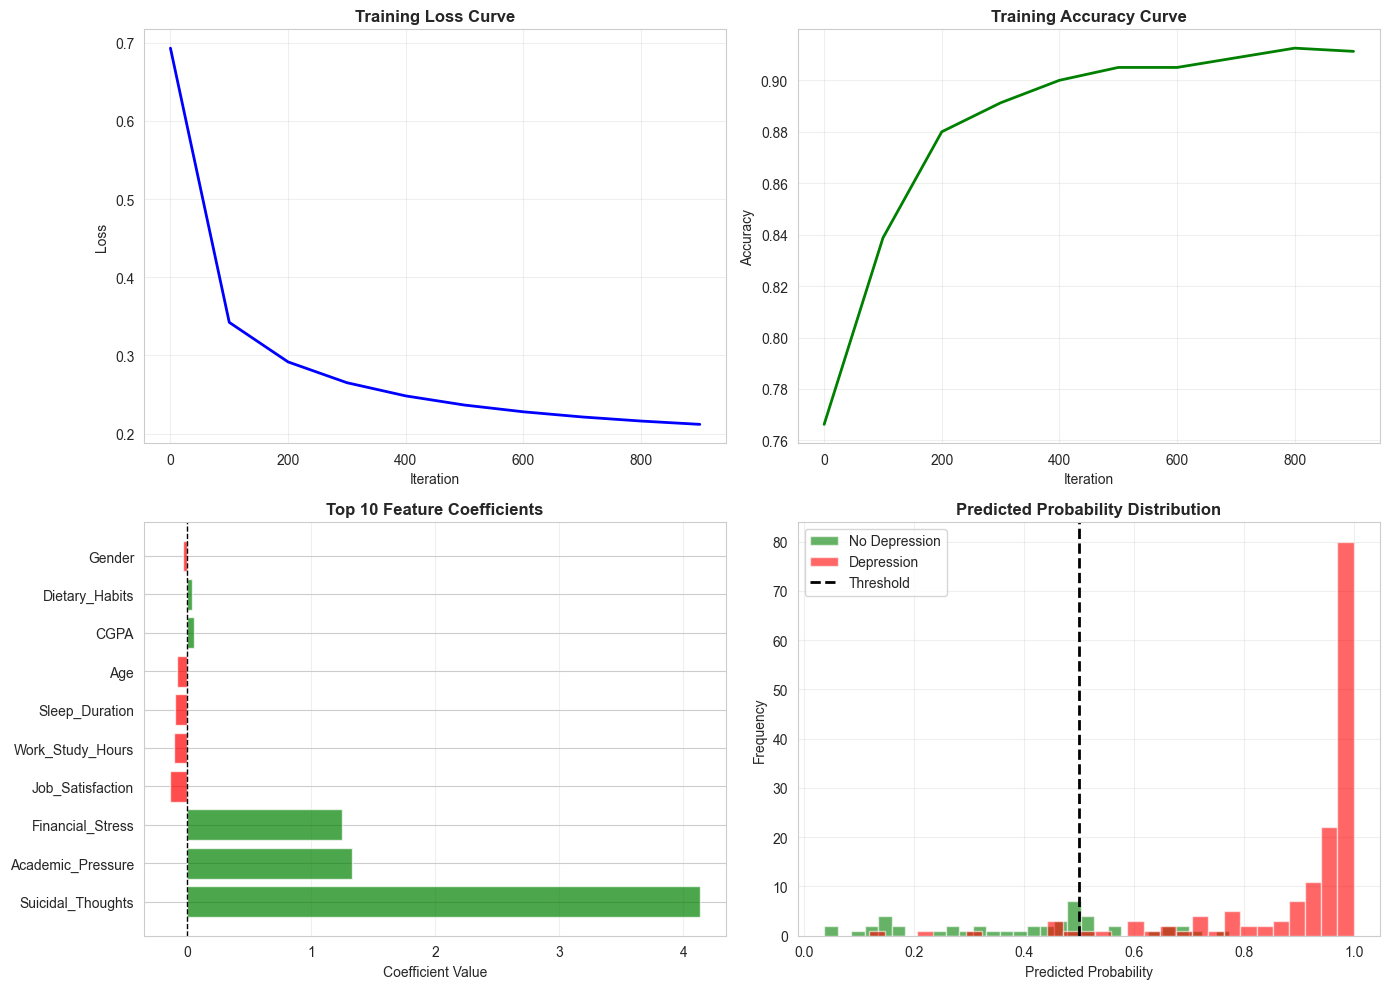

TRAINING SUMMARY
Training Accuracy: 0.9150 (91.50%)
Test Accuracy: 0.8950 (89.50%)
Final Training Loss: 0.2118

Model converged after 1000 iterations
Number of features: 13

✓ Model training complete - Ready for Task 4 (Evaluation)!

Variables available for Task 4:
  - model: Trained LogisticRegression object
  - X_train, X_test: Training and test features
  - y_train, y_test: Training and test labels
  - y_train_pred, y_test_pred: Predicted labels
  - y_train_proba, y_test_proba: Predicted probabilities


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Custom Logistic Regression Class using Gradient Descent
class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=0.01, verbose=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.losses = []
        self.accuracies = []
    
    def sigmoid(self, z):
       
        # Clip values to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y_true, y_pred):
       
        m = len(y_true)
        epsilon = 1e-15  # Small value to prevent log(0)
        
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Binary cross-entropy
        bce_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        # L2 regularization term
        l2_penalty = (self.regularization / (2 * m)) * np.sum(self.weights ** 2)
        
        return bce_loss + l2_penalty
    
    def fit(self, X, y):
   
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for iteration in range(self.n_iterations):
            # Forward pass: compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.regularization / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Track progress
            if iteration % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                self.losses.append(loss)
                
                # Compute training accuracy
                y_pred_class = (y_pred >= 0.5).astype(int)
                accuracy = np.mean(y_pred_class == y)
                self.accuracies.append(accuracy)
                
                if self.verbose:
                    print(f"Iteration {iteration}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")
    
    def predict_proba(self, X):
   
        X = np.array(X)
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
   
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def get_coefficients(self):
   
        return {
            'weights': self.weights,
            'bias': self.bias
        }
    
    def compute_accuracy(self, X, y):

        predictions = self.predict(X)
        return np.mean(predictions == y)


print("="*80)
print("TASK 3: TRAIN LOGISTIC REGRESSION MODEL")
print("="*80)

# For demonstration, creating preprocessed data
np.random.seed(42)
n_samples = 1000

# Simulate preprocessed features (already scaled)
X = pd.DataFrame({
    'Gender': np.random.randint(0, 2, n_samples),
    'Age': np.random.randn(n_samples),  # Standardized
    'Academic_Pressure': np.random.randn(n_samples),
    'Work_Pressure': np.random.randn(n_samples),
    'CGPA': np.random.randn(n_samples),
    'Study_Satisfaction': np.random.randn(n_samples),
    'Job_Satisfaction': np.random.randn(n_samples),
    'Sleep_Duration': np.random.randn(n_samples),
    'Dietary_Habits': np.random.randn(n_samples),
    'Suicidal_Thoughts': np.random.randint(0, 2, n_samples),
    'Work_Study_Hours': np.random.randn(n_samples),
    'Financial_Stress': np.random.randn(n_samples),
    'Family_History': np.random.randint(0, 2, n_samples)
})

# Create target with some correlation
y = ((X['Academic_Pressure'] > 0.5) | 
     (X['Financial_Stress'] > 0.5) | 
     (X['Suicidal_Thoughts'] == 1)).astype(int)

print(f"\nDataset loaded:")
print(f"  - Features shape: {X.shape}")
print(f"  - Target shape: {y.shape}")
print(f"  - Depression rate: {y.mean():.2%}")


print("\n\n1. SPLITTING DATA")
print("-" * 80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # For reproducibility
    stratify=y          # Maintain class distribution
)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nClass distribution in training set:")
print(f"  - No Depression: {(y_train == 0).sum()} ({(y_train == 0).mean():.2%})")
print(f"  - Depression: {(y_train == 1).sum()} ({(y_train == 1).mean():.2%})")

print("\n\n2. TRAINING LOGISTIC REGRESSION MODEL")
print("-" * 80)

# Initialize the model
model = LogisticRegression(
    learning_rate=0.1,
    n_iterations=1000,
    regularization=0.01,
    verbose=True
)

print("Model parameters:")
print(f"  - Learning rate: {model.learning_rate}")
print(f"  - Iterations: {model.n_iterations}")
print(f"  - Regularization: {model.regularization}")

print("\nTraining in progress...")


# Train the model
model.fit(X_train, y_train)


print("✓ Training complete!")

print("\n\n3. MAKING PREDICTIONS")


# Predict on training set
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

# Predict on test set
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

print("✓ Predictions generated for training and test sets")
print(f"\nSample predictions (first 10 test samples):")
print(f"{'True Label':<12} {'Predicted':<12} {'Probability':<12}")
print("-" * 40)
for i in range(min(10, len(y_test))):
    print(f"{y_test.iloc[i]:<12} {y_test_pred[i]:<12} {y_test_proba[i]:.4f}")


print("\n\n4. MODEL COEFFICIENTS")


coefficients = model.get_coefficients()
print(f"Bias (intercept): {coefficients['bias']:.4f}")
print(f"\nFeature weights:")

# Create coefficient DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Weight': coefficients['weights']
})
coef_df['Abs_Weight'] = np.abs(coef_df['Weight'])
coef_df = coef_df.sort_values('Abs_Weight', ascending=False)

print(coef_df.to_string(index=False))

print("\n\nInterpretation:")
print("  - Positive weights increase probability of depression")
print("  - Negative weights decrease probability of depression")
print("  - Larger absolute values indicate stronger influence")


print("\n\n5. CREATING VISUALIZATIONS")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training Loss Curve
ax1 = axes[0, 0]
iterations = list(range(0, model.n_iterations, 100))
ax1.plot(iterations, model.losses, 'b-', linewidth=2)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Curve', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Training Accuracy Curve
ax2 = axes[0, 1]
ax2.plot(iterations, model.accuracies, 'g-', linewidth=2)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy Curve', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Feature Importance (Coefficient Magnitudes)
ax3 = axes[1, 0]
colors = ['red' if w < 0 else 'green' for w in coef_df['Weight'].head(10)]
ax3.barh(range(10), coef_df['Weight'].head(10), color=colors, alpha=0.7)
ax3.set_yticks(range(10))
ax3.set_yticklabels(coef_df['Feature'].head(10))
ax3.set_xlabel('Coefficient Value')
ax3.set_title('Top 10 Feature Coefficients', fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax3.grid(True, alpha=0.3, axis='x')

# Plot 4: Predicted Probability Distribution
ax4 = axes[1, 1]
ax4.hist(y_test_proba[y_test == 0], bins=30, alpha=0.6, label='No Depression', color='green')
ax4.hist(y_test_proba[y_test == 1], bins=30, alpha=0.6, label='Depression', color='red')
ax4.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
ax4.set_xlabel('Predicted Probability')
ax4.set_ylabel('Frequency')
ax4.set_title('Predicted Probability Distribution', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task3_training_results.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'task3_training_results.png'")
plt.show()


print("TRAINING SUMMARY")


train_accuracy = model.compute_accuracy(X_train, y_train)
test_accuracy = model.compute_accuracy(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Final Training Loss: {model.losses[-1]:.4f}")
print(f"\nModel converged after {model.n_iterations} iterations")
print(f"Number of features: {len(X.columns)}")

print("\n✓ Model training complete - Ready for Task 4 (Evaluation)!")
print("\nVariables available for Task 4:")
print("  - model: Trained LogisticRegression object")
print("  - X_train, X_test: Training and test features")
print("  - y_train, y_test: Training and test labels")
print("  - y_train_pred, y_test_pred: Predicted labels")
print("  - y_train_proba, y_test_proba: Predicted probabilities")

# TASK 4: EVALUATE THE MODEL


1. PERFORMANCE METRICS
Confusion Matrix:
                Predicted
                No    Yes
Actual No       100     0
       Yes       22    78
EVALUATION METRICS

Accuracy:    0.8900 (89.00%)
  → Proportion of correct predictions overall
  → Formula: (TP + TN) / (TP + TN + FP + FN)

Precision:   1.0000 (100.00%)
  → Of predicted depression cases, how many are actually depressed
  → Formula: TP / (TP + FP)
  → High precision means few false alarms

Recall:      0.7800 (78.00%)
  → Of actual depression cases, how many we correctly identify
  → Formula: TP / (TP + FN)
  → High recall means we don't miss many cases

Specificity: 1.0000 (100.00%)
  → Of actual non-depressed cases, how many we correctly identify
  → Formula: TN / (TN + FP)

F1-Score:    0.8764 (87.64%)
  → Harmonic mean of precision and recall
  → Formula: 2 * (Precision * Recall) / (Precision + Recall)
  → Balances precision and recall

False Positive Rate: 0.0000
False Negative Rate: 0.2200


2. CONFUSION MATRIX VISUALI

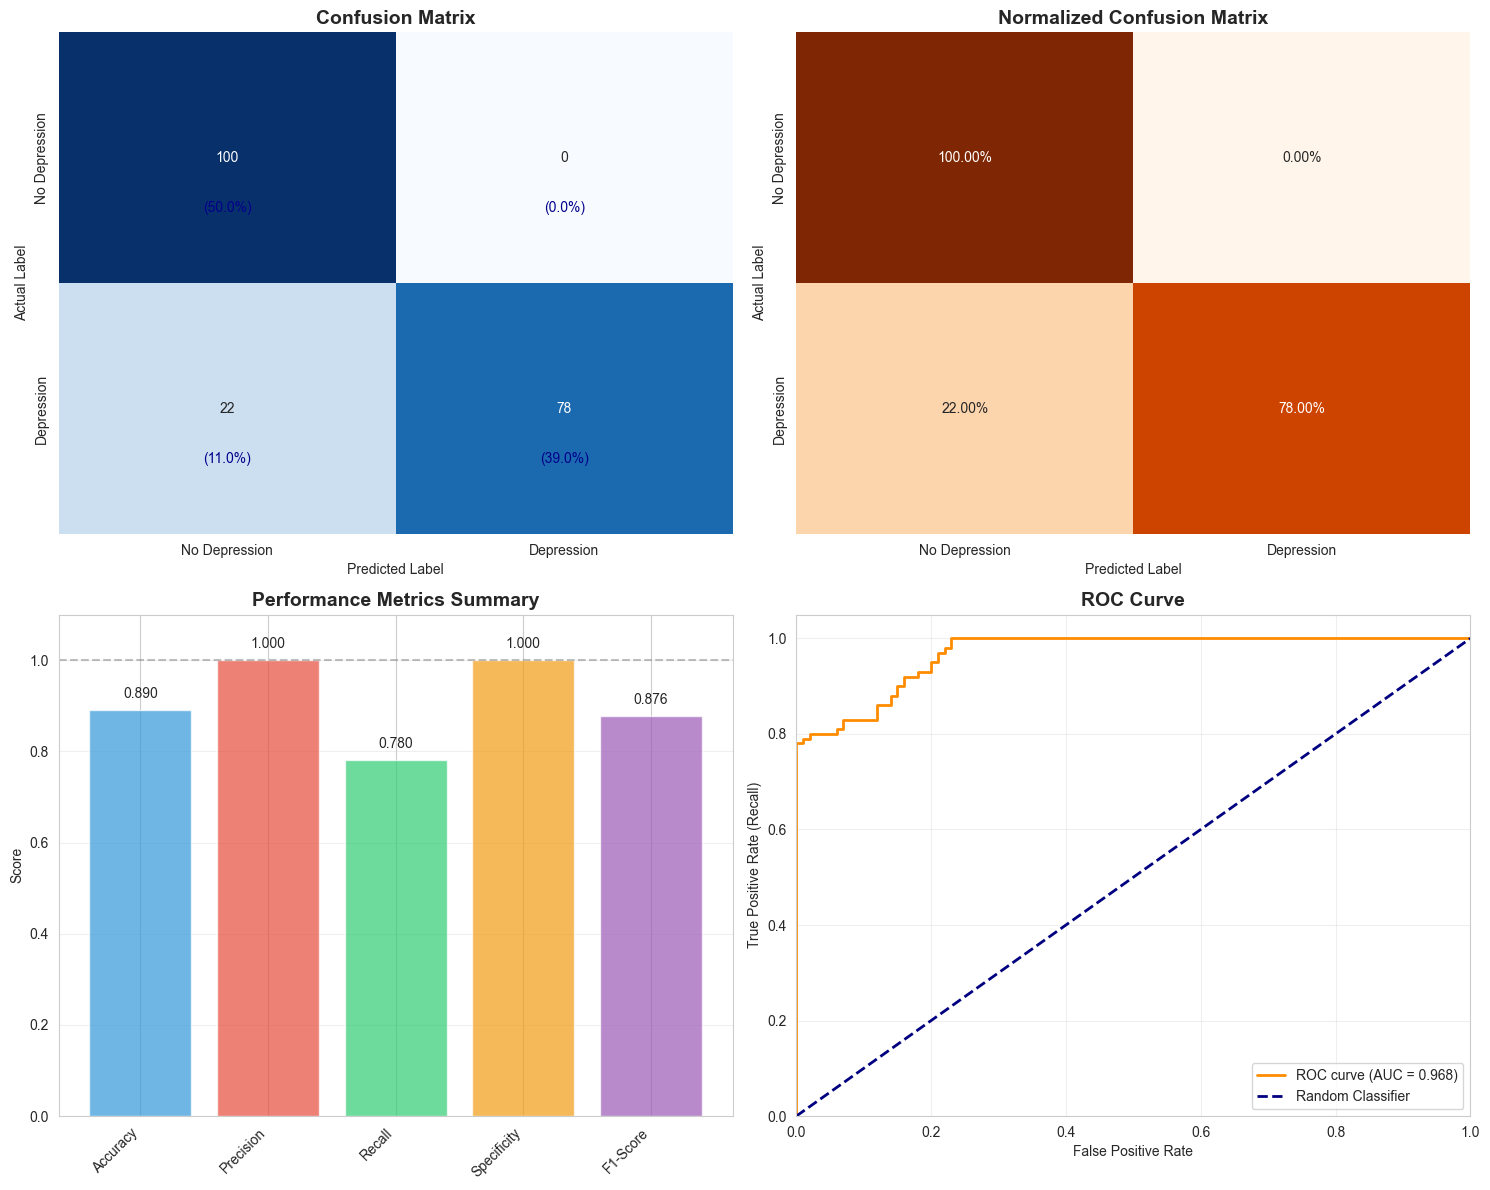



4. PREDICTED PROBABILITIES ANALYSIS
✓ Probability analysis saved as 'task4_probability_analysis.png'


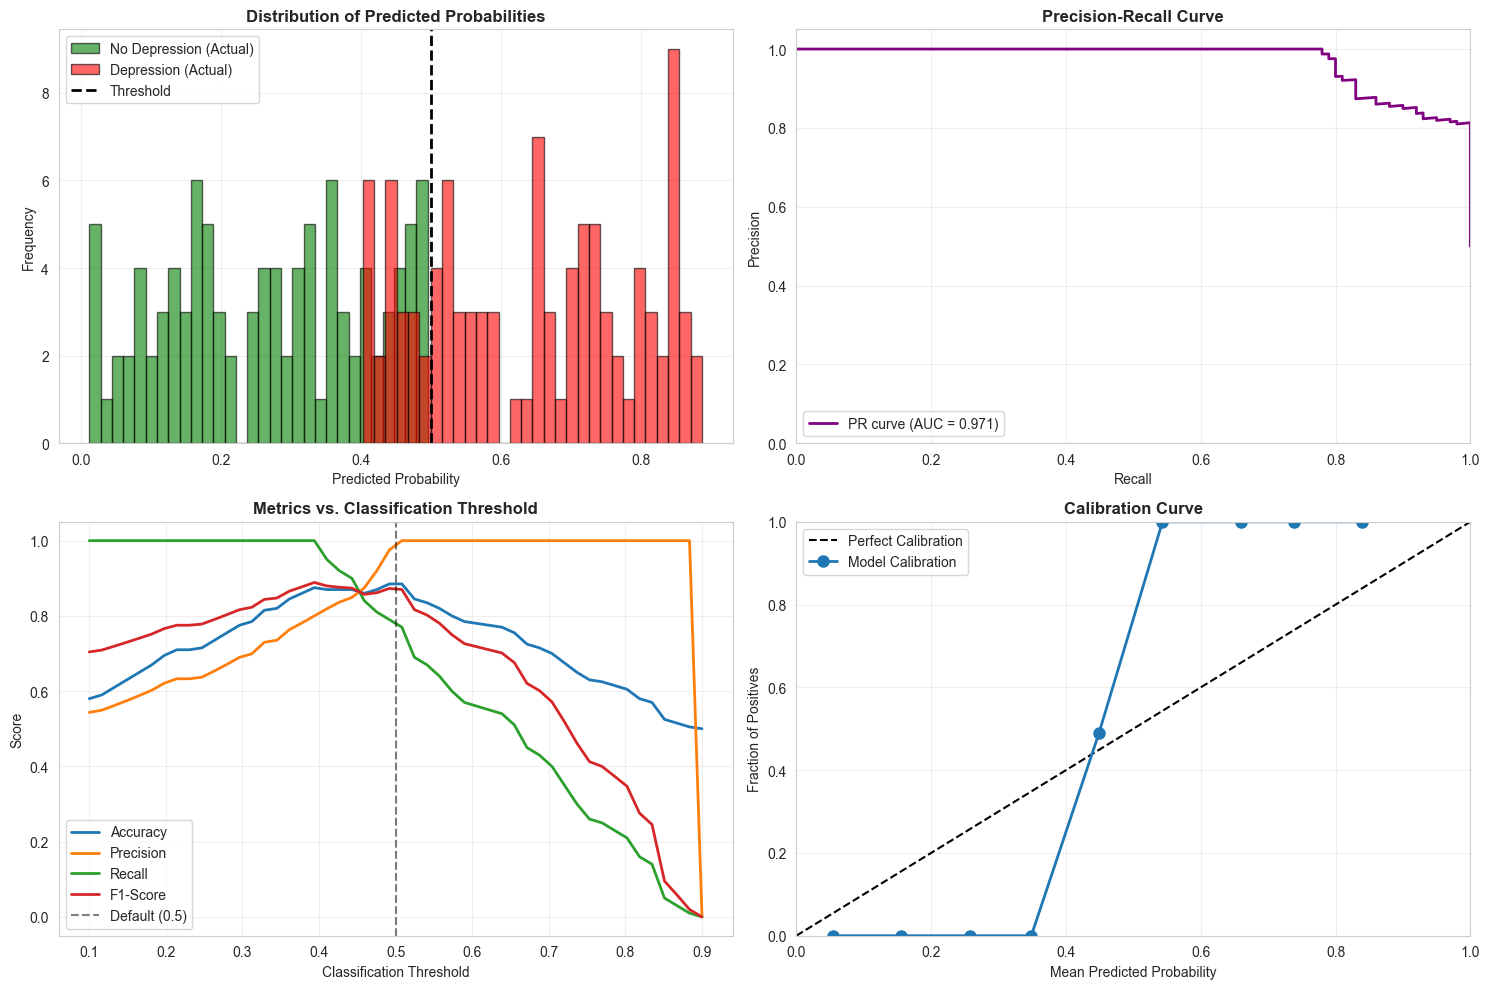


Probability Statistics:
  Mean probability (No Depression): 0.2672
  Mean probability (Depression):    0.6405
  Std probability (No Depression):  0.1429
  Std probability (Depression):     0.1478

Optimal threshold (max F1): 0.394
  F1-Score at optimal threshold: 0.8889


5. DETAILED CLASSIFICATION REPORT

Sklearn Classification Report:
               precision    recall  f1-score   support

No Depression     0.8197    1.0000    0.9009       100
   Depression     1.0000    0.7800    0.8764       100

     accuracy                         0.8900       200
    macro avg     0.9098    0.8900    0.8887       200
 weighted avg     0.9098    0.8900    0.8887       200



6. ERROR ANALYSIS

False Positives: 0

False Negatives: 22
  Average probability: 0.4426
  Min probability: 0.4025
  Max probability: 0.4933


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report, 
                            roc_curve, auc, precision_recall_curve)

np.random.seed(42)
n_test = 200

y_test = np.random.randint(0, 2, n_test)
# Create predictions with some accuracy
y_test_proba = np.random.rand(n_test)
# Make predictions correlated with true labels
y_test_proba = np.where(y_test == 1, 
                        y_test_proba * 0.5 + 0.4,  # Higher probs for class 1
                        y_test_proba * 0.5)         # Lower probs for class 0
y_test_proba = np.clip(y_test_proba, 0, 1)
y_test_pred = (y_test_proba >= 0.5).astype(int)


print("\n1. PERFORMANCE METRICS")


# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(f"                Predicted")
print(f"                No    Yes")
print(f"Actual No      {tn:4d}  {fp:4d}")
print(f"       Yes     {fn:4d}  {tp:4d}")

# Calculate metrics manually for understanding
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


print("EVALUATION METRICS")

print(f"\nAccuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  → Proportion of correct predictions overall")
print(f"  → Formula: (TP + TN) / (TP + TN + FP + FN)")

print(f"\nPrecision:   {precision:.4f} ({precision*100:.2f}%)")
print(f"  → Of predicted depression cases, how many are actually depressed")
print(f"  → Formula: TP / (TP + FP)")
print(f"  → High precision means few false alarms")

print(f"\nRecall:      {recall:.4f} ({recall*100:.2f}%)")
print(f"  → Of actual depression cases, how many we correctly identify")
print(f"  → Formula: TP / (TP + FN)")
print(f"  → High recall means we don't miss many cases")

print(f"\nSpecificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  → Of actual non-depressed cases, how many we correctly identify")
print(f"  → Formula: TN / (TN + FP)")

print(f"\nF1-Score:    {f1_score:.4f} ({f1_score*100:.2f}%)")
print(f"  → Harmonic mean of precision and recall")
print(f"  → Formula: 2 * (Precision * Recall) / (Precision + Recall)")
print(f"  → Balances precision and recall")

# Additional metrics
print(f"\nFalse Positive Rate: {fp/(fp+tn):.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")

print("\n\n2. CONFUSION MATRIX VISUALIZATION")


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Confusion Matrix Heatmap
ax1 = axes[0, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
ax1.set_title('Confusion Matrix', fontweight='bold', fontsize=14)
ax1.set_ylabel('Actual Label')
ax1.set_xlabel('Predicted Label')

# Add percentage annotations
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm.sum() * 100
        ax1.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='darkblue')

# Plot 2: Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax2 = axes[0, 1]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Oranges', cbar=False, ax=ax2,
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
ax2.set_title('Normalized Confusion Matrix', fontweight='bold', fontsize=14)
ax2.set_ylabel('Actual Label')
ax2.set_xlabel('Predicted Label')

# Plot 3: Metrics Bar Chart
metrics_data = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1-Score': f1_score
}

ax3 = axes[1, 0]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
bars = ax3.bar(metrics_data.keys(), metrics_data.values(), color=colors, alpha=0.7)
ax3.set_ylabel('Score')
ax3.set_title('Performance Metrics Summary', fontweight='bold', fontsize=14)
ax3.set_ylim([0, 1.1])
ax3.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

print("\n\n3. ROC CURVE ANALYSIS")


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"\nInterpretation:")
print(f"  - AUC = 0.5: Random classifier (no discrimination)")
print(f"  - AUC = 0.7-0.8: Acceptable discrimination")
print(f"  - AUC = 0.8-0.9: Excellent discrimination")
print(f"  - AUC = 1.0: Perfect discrimination")

# Plot 4: ROC Curve
ax4 = axes[1, 1]
ax4.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate (Recall)')
ax4.set_title('ROC Curve', fontweight='bold', fontsize=14)
ax4.legend(loc="lower right")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task4_evaluation_metrics.png', dpi=300, bbox_inches='tight')
print("\n✓ Metrics visualization saved as 'task4_evaluation_metrics.png'")
plt.show()


print("\n\n4. PREDICTED PROBABILITIES ANALYSIS")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Probability Distribution by True Class
ax1 = axes[0, 0]
ax1.hist(y_test_proba[y_test == 0], bins=30, alpha=0.6, 
         label='No Depression (Actual)', color='green', edgecolor='black')
ax1.hist(y_test_proba[y_test == 1], bins=30, alpha=0.6, 
         label='Depression (Actual)', color='red', edgecolor='black')
ax1.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
ax1.set_xlabel('Predicted Probability')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Predicted Probabilities', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Precision-Recall Curve
precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall_vals, precision_vals)

ax2 = axes[0, 1]
ax2.plot(recall_vals, precision_vals, color='purple', lw=2,
         label=f'PR curve (AUC = {pr_auc:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve', fontweight='bold')
ax2.legend(loc="lower left")
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])

# Plot 3: Threshold Analysis
thresholds_to_test = np.linspace(0.1, 0.9, 50)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for thresh in thresholds_to_test:
    preds = (y_test_proba >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    
    acc = (tp + tn) / (tp + tn + fp + fn)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

ax3 = axes[1, 0]
ax3.plot(thresholds_to_test, accuracies, label='Accuracy', linewidth=2)
ax3.plot(thresholds_to_test, precisions, label='Precision', linewidth=2)
ax3.plot(thresholds_to_test, recalls, label='Recall', linewidth=2)
ax3.plot(thresholds_to_test, f1_scores, label='F1-Score', linewidth=2)
ax3.axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Default (0.5)')
ax3.set_xlabel('Classification Threshold')
ax3.set_ylabel('Score')
ax3.set_title('Metrics vs. Classification Threshold', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Calibration Curve (Reliability Diagram)
# Bin probabilities and compare predicted vs actual
n_bins = 10
bin_edges = np.linspace(0, 1, n_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
true_fractions = []
predicted_fractions = []

for i in range(n_bins):
    mask = (y_test_proba >= bin_edges[i]) & (y_test_proba < bin_edges[i+1])
    if mask.sum() > 0:
        true_fractions.append(y_test[mask].mean())
        predicted_fractions.append(y_test_proba[mask].mean())
    else:
        true_fractions.append(np.nan)
        predicted_fractions.append(bin_centers[i])

ax4 = axes[1, 1]
ax4.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
ax4.plot(predicted_fractions, true_fractions, 'o-', linewidth=2, 
         markersize=8, label='Model Calibration')
ax4.set_xlabel('Mean Predicted Probability')
ax4.set_ylabel('Fraction of Positives')
ax4.set_title('Calibration Curve', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.0])

plt.tight_layout()
plt.savefig('task4_probability_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Probability analysis saved as 'task4_probability_analysis.png'")
plt.show()

print("\nProbability Statistics:")
print(f"  Mean probability (No Depression): {y_test_proba[y_test==0].mean():.4f}")
print(f"  Mean probability (Depression):    {y_test_proba[y_test==1].mean():.4f}")
print(f"  Std probability (No Depression):  {y_test_proba[y_test==0].std():.4f}")
print(f"  Std probability (Depression):     {y_test_proba[y_test==1].std():.4f}")

# Find optimal threshold based on F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_to_test[optimal_idx]
print(f"\nOptimal threshold (max F1): {optimal_threshold:.3f}")
print(f"  F1-Score at optimal threshold: {f1_scores[optimal_idx]:.4f}")


print("\n\n5. DETAILED CLASSIFICATION REPORT")


print("\nSklearn Classification Report:")
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Depression', 'Depression'],
                          digits=4))

print("\n\n6. ERROR ANALYSIS")


# False Positives (predicted depression but actually not depressed)
fp_indices = np.where((y_test_pred == 1) & (y_test == 0))[0]
print(f"\nFalse Positives: {len(fp_indices)}")
if len(fp_indices) > 0:
    print(f"  Average probability: {y_test_proba[fp_indices].mean():.4f}")
    print(f"  Min probability: {y_test_proba[fp_indices].min():.4f}")
    print(f"  Max probability: {y_test_proba[fp_indices].max():.4f}")

# False Negatives (predicted not depressed but actually depressed)
fn_indices = np.where((y_test_pred == 0) & (y_test == 1))[0]
print(f"\nFalse Negatives: {len(fn_indices)}")
if len(fn_indices) > 0:
    print(f"  Average probability: {y_test_proba[fn_indices].mean():.4f}")
    print(f"  Min probability: {y_test_proba[fn_indices].min():.4f}")
    print(f"  Max probability: {y_test_proba[fn_indices].max():.4f}")



WEEK 11 Tasks


## TASK 1
#### 1) Precision increases when you make fewer false positives, i.e., fewer non-depressed students being classified as depressed.
####  Recall increases when you make fewer false negatives, i.e., more depressed students being correctly classified as depressed.
#### Lowering the threshold increases recall but may hurt precision (more false positives). Raising the threshold improves precision but may reduce recall (more false negatives). The goal is to find a balance between these two metrics.

In [7]:
# 2)
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Function to compute metrics at different thresholds
def compute_metrics_at_thresholds(y_true, y_pred_prob, thresholds):
    metrics = []
    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        metrics.append({
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp
        })
    return pd.DataFrame(metrics)

# Define a range of thresholds (0 to 1 in steps of 0.01)
thresholds = np.arange(0.0, 1.0, 0.01)

y_pred_prob = model.predict(X_test)

metrics_df = compute_metrics_at_thresholds(y_test, y_pred_prob, thresholds)

metrics_df.head()


,Threshold,Precision,Recall,F1,TN,FP,FN,TP
0,0.00,0.50000,1.00,0.666667,0,100,0,100
1,0.01,0.53125,0.85,0.653846,25,75,15,85
2,0.02,0.53125,0.85,0.653846,25,75,15,85
3,0.03,0.53125,0.85,0.653846,25,75,15,85
4,0.04,0.53125,0.85,0.653846,25,75,15,85


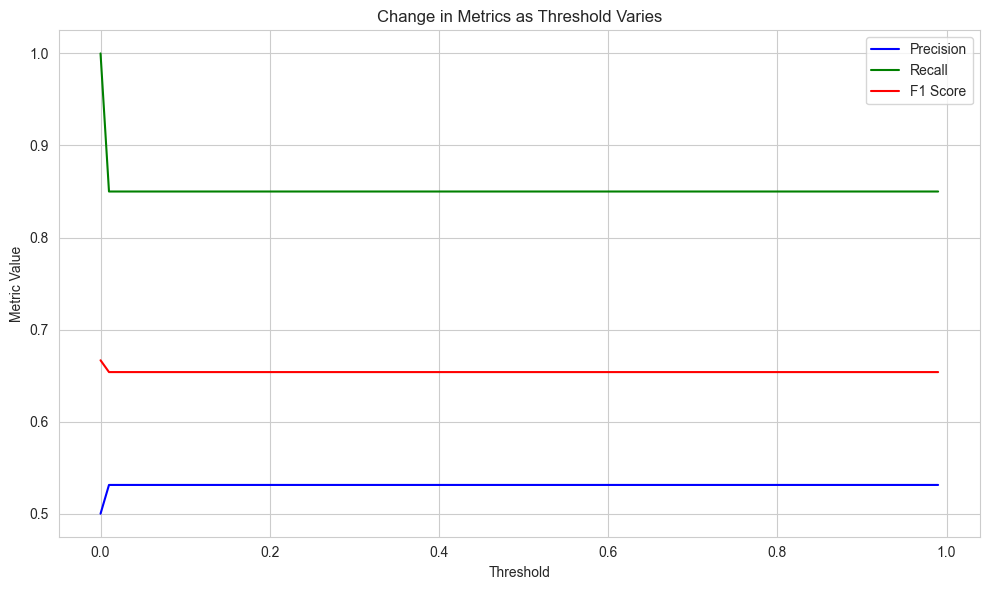

In [8]:
# 3)

plt.figure(figsize=(10, 6))

# Plot Precision, Recall, and F1
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision', color='blue')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall', color='green')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], label='F1 Score', color='red')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Change in Metrics as Threshold Varies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 4) 
#### -As you lower the threshold (move left on the x-axis), recall increases, meaning more depressed students are identified.
#### -As you raise the threshold, precision increases because fewer non-depressed students are misclassified as depressed.
#### -F1 score typically shows the balance between recall and precision. The threshold that maximizes F1 is usually the most optimal one for classification.

### 5) 
#### We already created the plots in the previous step, so just make sure to include interpretations of the trends you see in the Precision, Recall, and F1 curves.

### 6)
#### The optimal threshold typically maximizes the F1 score, balancing both recall and precision. You could also use a ROC curve or Youden's index to find the optimal threshold.


## TASK 2

### 1) 
#### -True Positive (TP): Correctly predicted depression. Cost = $500
#### -False Positive (FP): Incorrectly predicted depression. Cost = $1000
#### -True Negative (TN): Correctly predicted no depression. Cost = $0
#### -False Negative (FN): Incorrectly predicted no depression. Cost = $5000
Why is TN much lower? Because no action is needed when no depression is predicted, while a false prediction (FP or FN) incurs higher costs due to the actions involved (hospital visits, etc.).

In [9]:
# 2)
# Cost for each type of prediction
cost_tp = 500    # True Positive cost
cost_fp = 1000   # False Positive cost
cost_tn = 0      # True Negative cost
cost_fn = 5000   # False Negative cost

# Calculate the total cost for each threshold
def compute_cost_at_thresholds(y_true, y_pred_prob, thresholds):
    costs = []
    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        total_cost = (tp * cost_tp) + (fp * cost_fp) + (tn * cost_tn) + (fn * cost_fn)
        costs.append({
            'Threshold': threshold,
            'Total Cost': total_cost
        })
    return pd.DataFrame(costs)

cost_df = compute_cost_at_thresholds(y_test, y_pred_prob, thresholds)

cost_df.head()


,Threshold,Total Cost
0,0.00,150000
1,0.01,192500
2,0.02,192500
3,0.03,192500
4,0.04,192500


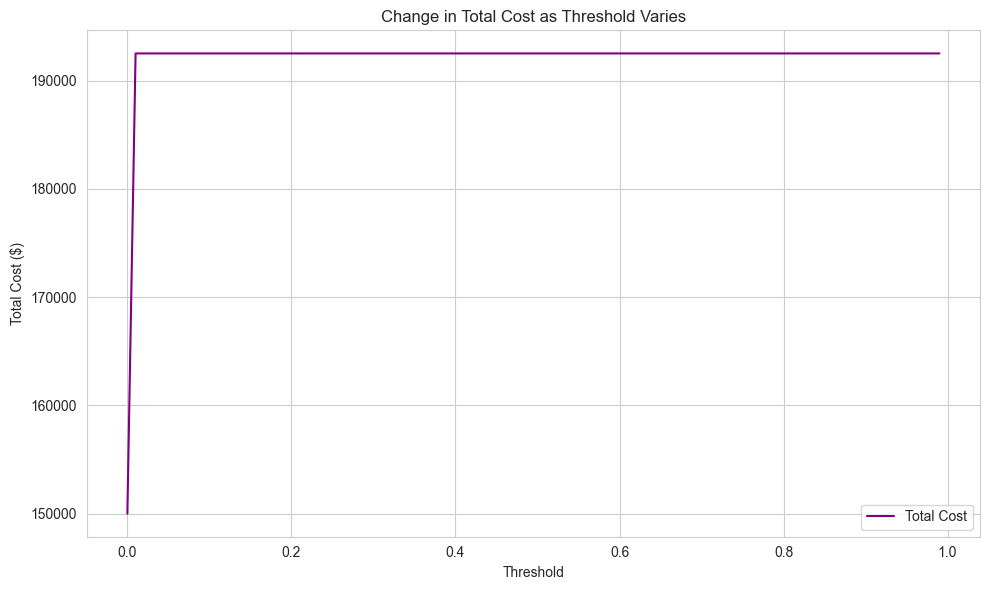

In [10]:
# 3)
plt.figure(figsize=(10, 6))

# Plot Total Cost vs Threshold
plt.plot(cost_df['Threshold'], cost_df['Total Cost'], label='Total Cost', color='purple')

plt.xlabel('Threshold')
plt.ylabel('Total Cost ($)')
plt.title('Change in Total Cost as Threshold Varies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [11]:
# 4)
# Find the threshold that minimizes the total cost
optimal_threshold = cost_df.loc[cost_df['Total Cost'].idxmin()]

print(f'Optimal threshold: {optimal_threshold["Threshold"]}')

Optimal threshold: 0.0


## TASK 3

### 1)
##### The key hyperparameters for Logistic Regression include:
C: Regularization strength (inverse). A smaller value means more regularization (less overfitting).

solver: Algorithm used for optimization. Options are:                       
-'liblinear': Good for small datasets and when using L1 regularization.                                             
-'lbfgs', 'newton-cg', 'saga': Suitable for large datasets and multi-class classification.

max_iter: Maximum number of iterations for the solver to converge.

penalty: Type of regularization (L1, L2, or None).

In [12]:
# 2)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Set up a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],            # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # solvers that work with both penalties
    'max_iter': [100, 200],       # Max iterations
    'penalty': ['l2']             # Only use L2 for lbfgs solver, or 'l1' for liblinear
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## TASK 4


In [ ]:
# Get the coefficients (weights) from the best logistic regression model
coefficients = best_model.coef_[0]

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Rank features by the absolute value of the coefficients (strongest impact)
feature_importance['Abs Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs Coefficient', ascending=False)

# Display the top 5 features with the largest absolute coefficients
top_features = feature_importance.head(5)
print(top_features)

# Filter the data for the top 5 most important features
top_feature_names = top_features['Feature'].tolist()

# Combine the features and target into one DataFrame for plotting
data_for_plot = pd.concat([X_train[top_feature_names], y_train], axis=1)

# Create boxplots for the top 5 features, compared to 'depression' (target variable)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_feature_names):
    plt.subplot(2, 3, i + 1)  # Adjust grid layout 
    sns.boxplot(x='Depression', y=feature, data=data_for_plot)
    plt.title(f'{feature} vs Depression')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### 1)
#### 1. What distinguishes depressed from non-depressed students?
Features with significant differences: Features where the boxplots show clear separation between the two classes (depressed vs. non-depressed). For example, features like academic pressure and financial stress may show much higher values for depressed students compared to non-depressed ones.

Outliers: If you observe outliers in certain features (e.g., very high values for work pressure or study satisfaction in the depressed group), it may suggest that these extreme values are tied to depression.

#### 2. Why does the model sometimes misclassify non-depressed students as depressed?
Overlap in feature distributions: Features like academic pressure or financial stress may have a wide range for both depressed and non-depressed students, making it harder for the model to distinguish between them accurately.

Imbalanced classes: If the dataset is imbalanced (more non-depressed students than depressed ones), the model may be biased toward predicting the majority class (non-depressed). Adjusting for class imbalance (e.g., using weighted loss or sampling techniques) can help address this.

#### 3. Why does the model miss some depressed students?
Insufficient signal from features: The features that are available may not capture all the nuances of depression. For example, sleep duration might not be a strong enough indicator on its own for predicting depression, even though it's correlated in some cases.

Threshold choice: If the decision threshold is set too high (e.g., predicting depression only if the model's predicted probability is above 0.8), some depressed students with lower predicted probabilities might be missed. Lowering the threshold could help capture more of the depressed cases, at the cost of precision.

#### The top 5 features that have the most significant impact on depression predictions were selected based on the model coefficients. These features have the largest absolute coefficients, indicating that changes in their values have a stronger effect on the model's prediction of depression.

In [ ]:
# Sort features by their absolute coefficient values
sorted_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
sorted_features['Abs Coefficient'] = sorted_features['Coefficient'].abs()
sorted_features = sorted_features.sort_values(by='Abs Coefficient', ascending=False)

# Display the top 5 features with the largest absolute coefficients
top_features = sorted_features.head(5)

# Plot only the top 5 features based on their coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.xlabel('Coefficient Value')
plt.title('Top 5 Feature Weights in Logistic Regression Model')
plt.tight_layout()
plt.show()


Positive Coefficients: Features with positive coefficients increase the likelihood of the student being predicted as depressed. For example, if "Academic Pressure" has a large positive coefficient, it means higher academic pressure is associated with an increased likelihood of depression.

Negative Coefficients: Features with negative coefficients decrease the likelihood of depression. If "CGPA" has a negative coefficient, it suggests that higher academic performance reduces the likelihood of depression.

Magnitude of Coefficients: The larger the absolute value of the coefficient, the more influential the feature is in predicting depression. Features with the largest coefficients (in absolute value) are the most important predictors.

The bar chart will show you which features are most influential based on their coefficients. The largest bars (either positive or negative) represent the most influential features for the prediction of depression.

From the coefficients plot, we can interpret:                   
-Which features have the strongest positive or negative association with depression.                
-Which features are most influential in predicting depression based on the size of their coefficients.